In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn import metrics

# About data

## This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within comming years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [10]:
pima=pd.read_csv('C:\\Users\\Ravi yadav\\Desktop\\pima.csv')

In [11]:
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
pima.dropna().sum()

Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
dtype: float64

In [15]:
pima.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

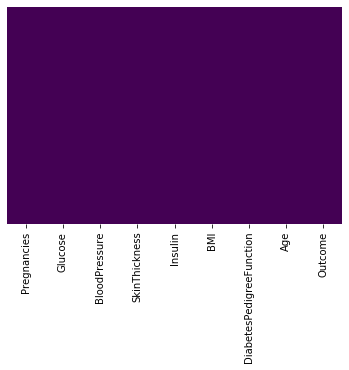

In [16]:
sns.heatmap(pima.isnull(),yticklabels=False,cbar=False,cmap="viridis")

#### showing no null values

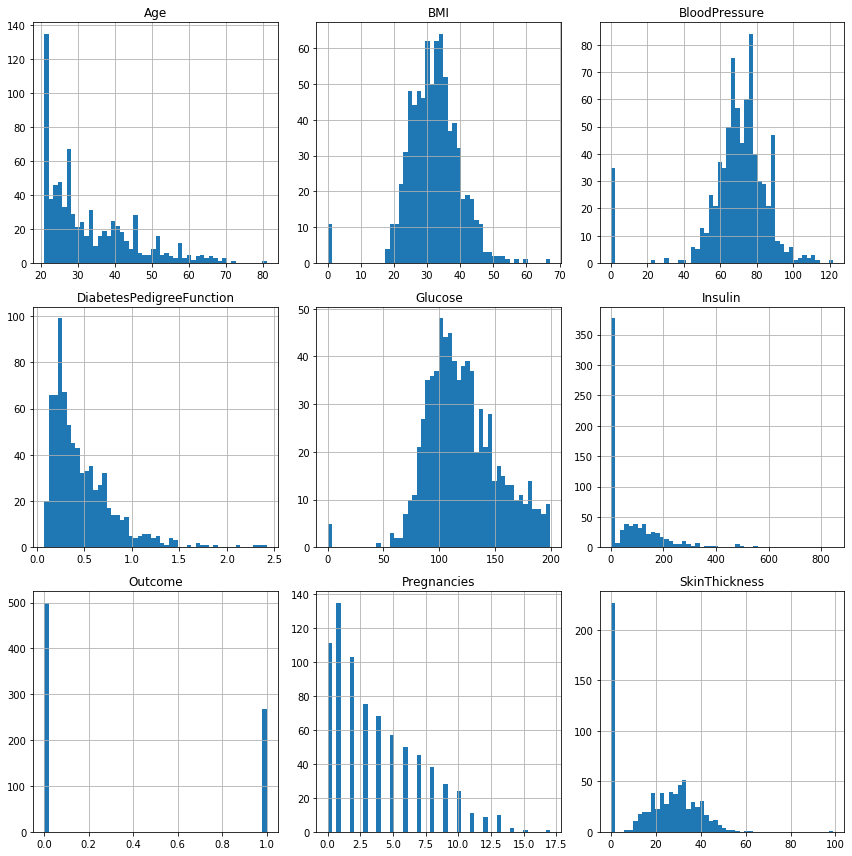

In [17]:
pima.hist(figsize=(12,12),bins=50)
plt.tight_layout()

### so by seeing this we can say that only BMI and BLOOD PRESSURE data was norally distributed and rest of the data is features are rightly skweed


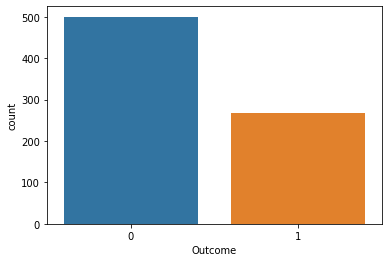

In [18]:
sns.countplot(x='Outcome', data=pima)

# since the number of person having diabetes is greate than person who don't have diabetes which shows data is imbalance

In [19]:
pima["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

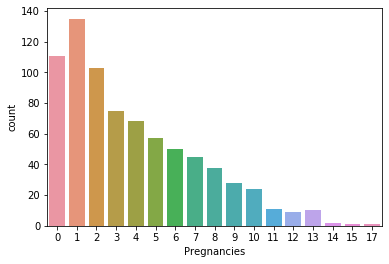

In [20]:
sns.countplot(x="Pregnancies", data=pima)

## Also from the above graph we can see that the risk of diabetes decrease as the number of Pregnancies increase

In [21]:
pimacor=pima.corr()

In [22]:
pimacor

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

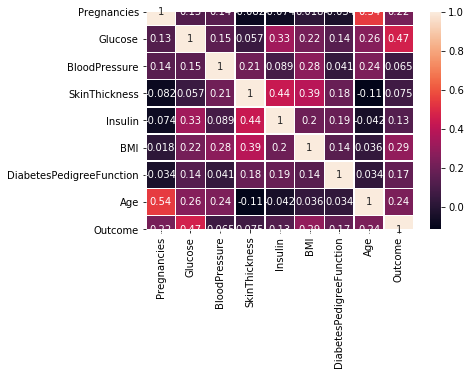

In [23]:
sns.heatmap(pimacor,linewidths=0.5,annot=True)

## from above heatmap we can infer that Glucose and BMI are correlated to outcome 

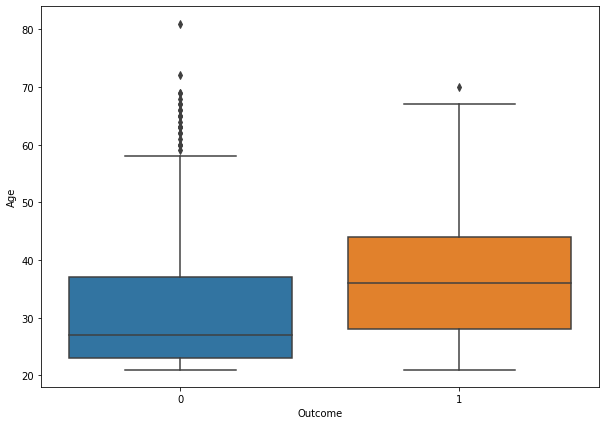

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome",y="Age",data=pima)

## so from the above box plot we can see that the person which are elder(average age=38) are high chances of having diabetes and the person which are younger(average age=28) in age are low at diabetes risks 

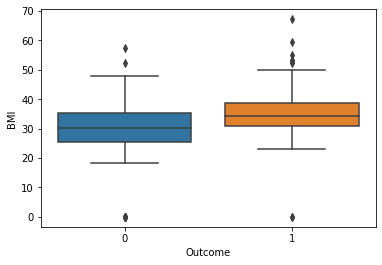

In [25]:
sns.boxplot(x="Outcome",y="BMI",data=pima)

## also the average BMI for person not having diabetes is arround 30 and the person having diabetes is above 30

In [26]:
X=pima.drop("Outcome",axis=1)

In [27]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

# MODEL FITTING AND TRANING

In [28]:
y=pima["Outcome"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree=DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
predictions=dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[118  29]
 [ 35  49]]


              precision    recall  f1-score   support

           0       0.77      0.80      0.79       147
           1       0.63      0.58      0.60        84

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231



In [49]:
predictions=dtree.predict(X_train)

In [51]:
print(confusion_matrix(y_train,predictions))
print("\n")
print(classification_report(y_train,predictions))

[[349   4]
 [ 16 168]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       353
           1       0.98      0.91      0.94       184

    accuracy                           0.96       537
   macro avg       0.97      0.95      0.96       537
weighted avg       0.96      0.96      0.96       537



In [36]:
from sklearn import tree

In [37]:
from sklearn.feature_selection import SelectKBest,f_regression
#Import chi2 for performing chi square test 
from sklearn.feature_selection import chi2
#test = SelectKBest(score_func=chi2, k=4)

In [38]:
X_new=SelectKBest(f_regression,k=5).fit_transform(X_train,y_train)

In [39]:
X_new[:5]

array([[ 11.   , 111.   ,  46.8  ,   0.925,  45.   ],
       [  2.   , 121.   ,  39.1  ,   0.886,  23.   ],
       [  4.   ,  99.   ,  32.8  ,   0.145,  33.   ],
       [  5.   , 111.   ,  23.9  ,   0.407,  27.   ],
       [  2.   ,  93.   ,  38.   ,   0.674,  23.   ]])

# VISUALIZATION OF MODEL

In [40]:
Dtree=dtree.fit(X_train,y_train)

In [41]:
plt.figure(figsize=(200,150))
tree.plot_tree(Dtree,filled=True,fontsize=70)

[Text(5289.073834196891, 7862.785714285715, 'X[1] <= 127.5\ngini = 0.45\nsamples = 537\nvalue = [353, 184]'),
 Text(2580.3886010362694, 7280.357142857143, 'X[7] <= 28.5\ngini = 0.309\nsamples = 346\nvalue = [280, 66]'),
 Text(968.5492227979274, 6697.928571428572, 'X[5] <= 30.95\ngini = 0.155\nsamples = 201\nvalue = [184, 17]'),
 Text(346.94300518134713, 6115.5, 'X[0] <= 7.5\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(231.29533678756476, 5533.071428571428, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(115.64766839378238, 4950.642857142857, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(346.94300518134713, 4950.642857142857, 'X[6] <= 0.713\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(231.29533678756476, 4368.214285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(462.59067357512953, 4368.214285714286, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(462.59067357512953, 5533.071428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

### when the attribute such as cretrion and max_deth changes then

In [42]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=10)

In [43]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
predictions=dtree.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[119  28]
 [ 37  47]]


              precision    recall  f1-score   support

           0       0.76      0.81      0.79       147
           1       0.63      0.56      0.59        84

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.72      0.71       231

